### Import Model Architectures
Custom Torch Models need to be instantiated for evaluation. The model_architectures.py file contains the model architectures so we can abstract it and focus only on the evaluations.

In [1]:
from model_architectures import *
import model_architectures
from data_curator import *
from attacks import * 
import csv
# Print available classes to verify our model architectures were imported
print(dir(model_architectures))

flags = ['fgsm', 'images']

Using device: cuda
Using device: cuda
['BasicBlock', 'DataLoader', 'F', 'Load', 'ResNetCIFAR', 'ResNetMNIST', 'ResnetSVHN', 'TensorDataset', 'Tester', 'Visualizer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'cifar_directory', 'conv3x3', 'current_directory', 'device', 'mnist_directory', 'nn', 'np', 'os', 'pd', 'pickle', 'plt', 'scipy', 'svhn_directory', 'torch']


### Loading the Model Weights
Using our model artifacts we load the weights back into the model so we have our pre-trained models to test our perturbations against.

In [2]:
mnist_resnet_model = ResNetMNIST(BasicBlock, [2, 2, 2, 2], num_classes=10, grayscale=True).to(device)
cifar_resnet_model = ResNetCIFAR(BasicBlock, [2, 2, 2, 2], num_classes=10, grayscale=False).to(device)
svhn_resnet_model = ResnetSVHN(BasicBlock, [2, 2, 2, 2], num_classes=10, grayscale=False).to(device)

#add map_location=torch.device('cpu') if running locally and ur not sai lol
device = 'cuda'
# mnist_resnet_model.load_state_dict(torch.load("artifacts/resnet18_mnist_model.pth", map_location=torch.device(device)))
# cifar_resnet_model.load_state_dict(torch.load("artifacts/resnet18_cifar_model.pth", map_location=torch.device(device)))
# svhn_resnet_model.load_state_dict(torch.load("artifacts/resnet18_svhn_model.pth",map_location=torch.device(device)))
mnist_resnet_model.load_state_dict(torch.load("artifacts/resnet18_mnist_model.pth"))
cifar_resnet_model.load_state_dict(torch.load("artifacts/resnet18_cifar_model.pth"))
svhn_resnet_model.load_state_dict(torch.load("artifacts/resnet18_svhn_model.pth"))

<All keys matched successfully>

In [3]:
mnist_resnet_model.eval()
cifar_resnet_model.eval()
svhn_resnet_model.eval()

ResnetSVHN(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

In [4]:
# Loading Data
loader = Load()
mnist_train_images, mnist_train_labels = loader.load_mnist_train_images()
cifar10_train_images, cifar10_train_labels = loader.load_cifar10_train_images()
svhn_train_images, svhn_train_labels = loader.load_svhn_train_images()

In [5]:
# train_loader_mnist = loader.convert_mnist_numpy_to_tensor(mnist_train_images, mnist_train_labels)
# train_loader_cifar10 = loader.convert_cifar10_numpy_to_tensor(cifar10_train_images, cifar10_train_labels)
# train_loader_svhn = loader.convert_svhn_numpy_to_tensor(svhn_train_images, svhn_train_labels)

batch_size = 10 * 256

train_loader_mnist = loader.convert_mnist_numpy_to_tensor(mnist_train_images[:batch_size], mnist_train_labels[:batch_size])
train_loader_cifar10 = loader.convert_cifar10_numpy_to_tensor(cifar10_train_images[:batch_size], cifar10_train_labels[:batch_size])
train_loader_svhn = loader.convert_svhn_numpy_to_tensor(svhn_train_images[:batch_size], svhn_train_labels[:batch_size])



### Curating Data
We repurpose our test functions for each attack to only output adversarial examples and the total accuracy from the attack without any hanging print statements. We then run them on the entire dataset, as opposed to a sample of 256, and then store these as CSV files. 

In [6]:
curator = Curator()

In [7]:
if 'fgsm' in flags:
    fgsm_mnist_accuracy, fgsm_mnist_examples = curator.curate_fgsm(mnist_resnet_model, train_loader_mnist, 0.05)
    fgsm_cifar10_accuracy, fgsm_cifar10_examples = curator.curate_fgsm(cifar_resnet_model, train_loader_cifar10, 0.025)
    fgsm_svhn_accuracy, fgsm_svhn_examples = curator.curate_fgsm(svhn_resnet_model, train_loader_svhn, 0.025)

Batch 1 Completed. # of Adversarial Examples: 19
Batch 2 Completed. # of Adversarial Examples: 35
Batch 3 Completed. # of Adversarial Examples: 55
Batch 4 Completed. # of Adversarial Examples: 73
Batch 5 Completed. # of Adversarial Examples: 109
Batch 6 Completed. # of Adversarial Examples: 135
Batch 7 Completed. # of Adversarial Examples: 151
Batch 8 Completed. # of Adversarial Examples: 169
Batch 9 Completed. # of Adversarial Examples: 183
Batch 10 Completed. # of Adversarial Examples: 203
Batch 1 Completed. # of Adversarial Examples: 237
Batch 2 Completed. # of Adversarial Examples: 477
Batch 3 Completed. # of Adversarial Examples: 724
Batch 4 Completed. # of Adversarial Examples: 962
Batch 5 Completed. # of Adversarial Examples: 1202
Batch 6 Completed. # of Adversarial Examples: 1446
Batch 7 Completed. # of Adversarial Examples: 1690
Batch 8 Completed. # of Adversarial Examples: 1928
Batch 9 Completed. # of Adversarial Examples: 2167
Batch 10 Completed. # of Adversarial Examples: 2

In [8]:
def reshape_image(flat_image, color = False):
    if color:
        # print(flat_image.shape)
        image_size = 32

        # Split the array into three parts
        split_size = flat_image.shape[0] // 3
        red_channel = flat_image[:split_size]
        green_channel = flat_image[split_size:2*split_size]
        blue_channel = flat_image[2*split_size:]
        # print(f"Red Shape: {red_channel.shape}")
        # print(f"Green Shape: {green_channel.shape}")
        # print(f"Blue Shape: {blue_channel.shape}")

        # Stack the three parts horizontally
        stacked_channels = np.dstack([red_channel, green_channel, blue_channel])
        # print(stacked_channels.shape)

        # Reshape the stacked array into a 3D array
        flat_image = stacked_channels.reshape( image_size, image_size, 3)

        return flat_image
    return np.array(flat_image).reshape(28, 28)

0.920703125
203
3
(28, 28)
0.05703125
2414
3
(3, 32, 32)
0.25703125
1902
3
(3, 32, 32)
(203, 785)
(2414, 3073)
(32, 32, 3)
(1902, 3073)
(32, 32, 3)


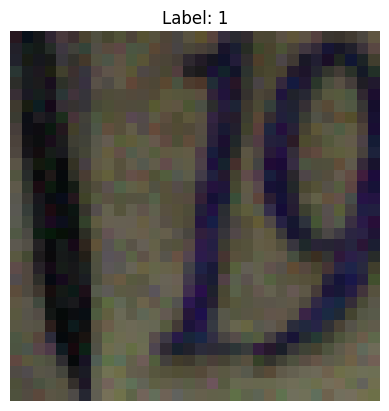

In [9]:

if 'fgsm' in flags:
    print(fgsm_mnist_accuracy)
    print(len(fgsm_mnist_examples))
    print(len(fgsm_mnist_examples[0]))
    print(fgsm_mnist_examples[0][2].shape)

    curator.store_data('augmented_data/fgsm_mnist_augmented_data.csv', fgsm_mnist_examples)

    print(fgsm_cifar10_accuracy)
    print(len(fgsm_cifar10_examples))
    print(len(fgsm_cifar10_examples[0]))
    print(fgsm_cifar10_examples[0][2].shape)

    curator.store_data('augmented_data/fgsm_cifar10_augmented_data.csv', fgsm_cifar10_examples, color = True)

    print(fgsm_svhn_accuracy)
    print(len(fgsm_svhn_examples))
    print(len(fgsm_svhn_examples[0]))
    print(fgsm_svhn_examples[0][2].shape)

    curator.store_data('augmented_data/fgsm_svhn_augmented_data.csv', fgsm_svhn_examples, color = True)

if 'images' in flags:
    # Load the images from the csv, convert them to h5, and then use the h5 file. 
    if 'fgsm' in flags:
        images = pd.read_csv("augmented_data/fgsm_mnist_augmented_data.csv")
        images.to_hdf("augmented_data/fgsm_mnist_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/fgsm_mnist_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0]  
    images = images.iloc[:, 1:]  

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image1 = reshape_image(first_image)

    if 'fgsm' in flags:
        images = pd.read_csv("augmented_data/fgsm_cifar10_augmented_data.csv")
        images.to_hdf("augmented_data/fgsm_cifar10_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/fgsm_cifar10_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image2 = reshape_image(np.array(first_image), color = True)
    print(reshaped_image2.shape)



    if 'fgsm' in flags:
        images = pd.read_csv("augmented_data/fgsm_svhn_augmented_data.csv")
        images.to_hdf("augmented_data/fgsm_svhn_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/fgsm_svhn_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image3= reshape_image(np.array(first_image), color = True)
    print(reshaped_image3.shape)
    # Display the image with its label
    plt.imshow(reshaped_image3)
    plt.title(f"Label: {first_label}")
    plt.axis('off')
    plt.show()

In [10]:
if 'pgd' in flags:
    pgd_mnist_accuracy, pgd_mnist_examples = curator.curate_pgd(mnist_resnet_model, train_loader_mnist, .25, 0.1 )
    pgd_cifar10_accuracy, pgd_cifar10_examples = curator.curate_pgd(cifar_resnet_model, train_loader_cifar10, .25, 0.00625)
    pgd_svhn_accuracy, pgd_svhn_examples = curator.curate_pgd(svhn_resnet_model, train_loader_svhn, .25, 0.00625)

(2386, 785)
(2356, 3073)
(32, 32, 3)
(2056, 3073)
(32, 32, 3)


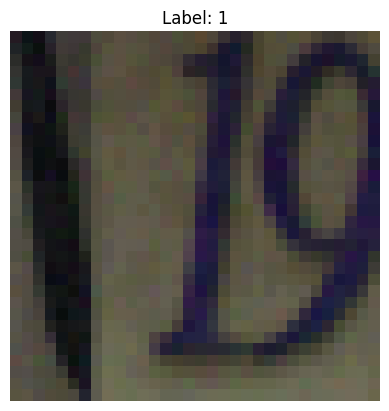

In [11]:

if 'pgd' in flags:
    print(pgd_mnist_accuracy)
    print(len(pgd_mnist_examples))
    print(len(pgd_mnist_examples[0]))
    print(pgd_mnist_examples[0][2].shape)

    curator.store_data('augmented_data/pgd_mnist_augmented_data.csv', pgd_mnist_examples)

    print(pgd_cifar10_accuracy)
    print(len(pgd_cifar10_examples))
    print(len(pgd_cifar10_examples[0]))
    print(pgd_cifar10_examples[0][2].shape)

    curator.store_data('augmented_data/pgd_cifar10_augmented_data.csv', pgd_cifar10_examples, color = True)

    print(pgd_svhn_accuracy)
    print(len(pgd_svhn_examples))
    print(len(pgd_svhn_examples[0]))
    print(pgd_svhn_examples[0][2].shape)

    curator.store_data('augmented_data/pgd_svhn_augmented_data.csv', pgd_svhn_examples, color = True)

if 'images' in flags:
    # Load the images from the csv, convert them to h5, and then use the h5 file. 
    if 'pgd' in flags:
        images = pd.read_csv("augmented_data/pgd_mnist_augmented_data.csv")
        images.to_hdf("augmented_data/pgd_mnist_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/pgd_mnist_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0]  
    images = images.iloc[:, 1:]  

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image1 = reshape_image(first_image)

    if 'pgd' in flags:
        images = pd.read_csv("augmented_data/pgd_cifar10_augmented_data.csv")
        images.to_hdf("augmented_data/pgd_cifar10_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/pgd_cifar10_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image2 = reshape_image(np.array(first_image), color = True)
    print(reshaped_image2.shape)



    if 'pgd' in flags:
        images = pd.read_csv("augmented_data/pgd_svhn_augmented_data.csv")
        images.to_hdf("augmented_data/pgd_svhn_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/pgd_svhn_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image3= reshape_image(np.array(first_image), color = True)
    print(reshaped_image3.shape)
    # Display the image with its label
    plt.imshow(reshaped_image3)
    plt.title(f"Label: {first_label}")
    plt.axis('off')
    plt.show()

In [12]:
if 'deepfool' in flags:
    deepfool_mnist_accuracy, deepfool_mnist_examples = curator.curate_deepfool(mnist_resnet_model, train_loader_mnist)
    deepfool_cifar10_accuracy, deepfool_cifar10_examples = curator.curate_deepfool(cifar_resnet_model, train_loader_cifar10)
    deepfool_svhn_accuracy, deepfool_svhn_examples = curator.curate_deepfool(svhn_resnet_model, train_loader_svhn)

(2560, 785)


(2560, 3073)
(32, 32, 3)
(2560, 3073)
(32, 32, 3)


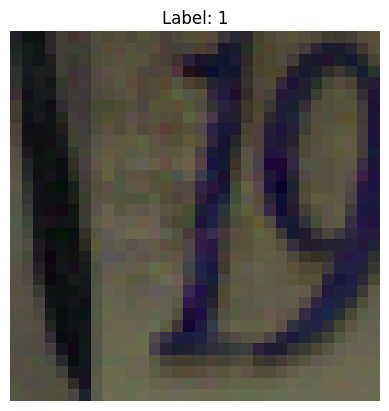

In [13]:

if 'deepfool' in flags:
    print(deepfool_mnist_accuracy)
    print(len(deepfool_mnist_examples))
    print(len(deepfool_mnist_examples[0]))
    print(deepfool_mnist_examples[0][2].shape)

    curator.store_data('augmented_data/deepfool_mnist_augmented_data.csv', deepfool_mnist_examples)

    print(deepfool_cifar10_accuracy)
    print(len(deepfool_cifar10_examples))
    print(len(deepfool_cifar10_examples[0]))
    print(deepfool_cifar10_examples[0][2].shape)

    curator.store_data('augmented_data/deepfool_cifar10_augmented_data.csv', deepfool_cifar10_examples, color = True)

    print(deepfool_svhn_accuracy)
    print(len(deepfool_svhn_examples))
    print(len(deepfool_svhn_examples[0]))
    print(deepfool_svhn_examples[0][2].shape)

    curator.store_data('augmented_data/deepfool_svhn_augmented_data.csv', deepfool_svhn_examples, color = True)

if 'images' in flags:
    # Load the images from the csv, convert them to h5, and then use the h5 file. 
    if 'deepfool' in flags:
        images = pd.read_csv("augmented_data/deepfool_mnist_augmented_data.csv")
        images.to_hdf("augmented_data/deepfool_mnist_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/deepfool_mnist_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0]  
    images = images.iloc[:, 1:]  

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image1 = reshape_image(first_image)

    if 'deepfool' in flags:
        images = pd.read_csv("augmented_data/deepfool_cifar10_augmented_data.csv")
        images.to_hdf("augmented_data/deepfool_cifar10_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/deepfool_cifar10_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image2 = reshape_image(np.array(first_image), color = True)
    print(reshaped_image2.shape)



    if 'deepfool' in flags:
        images = pd.read_csv("augmented_data/deepfool_svhn_augmented_data.csv")
        images.to_hdf("augmented_data/deepfool_svhn_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/deepfool_svhn_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image3= reshape_image(np.array(first_image), color = True)
    print(reshaped_image3.shape)
    # Display the image with its label
    plt.imshow(reshaped_image3)
    plt.title(f"Label: {first_label}")
    plt.axis('off')
    plt.show()

In [14]:
if 'jsma' in flags:
    jsma_mnist_accuracy, jsma_mnist_examples = curator.curate_jsma(mnist_resnet_model, train_loader_mnist, theta = 0.025)
    jsma_cifar10_accuracy, jsma_cifar10_examples = curator.curate_jsma(cifar_resnet_model, train_loader_cifar10, theta = 0.000625)
    jsma_svhn_accuracy, jsma_svhn_examples = curator.curate_jsma(svhn_resnet_model, train_loader_svhn, theta = 0.0025)

(2552, 785)
(2554, 3073)
(32, 32, 3)
(2548, 3073)
(32, 32, 3)


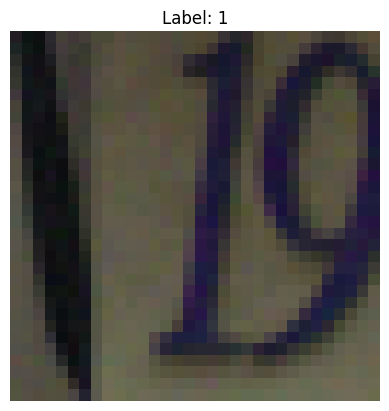

In [15]:

if 'jsma' in flags:
    print(jsma_mnist_accuracy)
    print(len(jsma_mnist_examples))
    print(len(jsma_mnist_examples[0]))
    print(jsma_mnist_examples[0][2].shape)

    curator.store_data('augmented_data/jsma_mnist_augmented_data.csv', jsma_mnist_examples)

    print(jsma_cifar10_accuracy)
    print(len(jsma_cifar10_examples))
    print(len(jsma_cifar10_examples[0]))
    print(jsma_cifar10_examples[0][2].shape)

    curator.store_data('augmented_data/jsma_cifar10_augmented_data.csv', jsma_cifar10_examples, color = True)

    print(jsma_svhn_accuracy)
    print(len(jsma_svhn_examples))
    print(len(jsma_svhn_examples[0]))
    print(jsma_svhn_examples[0][2].shape)

    curator.store_data('augmented_data/jsma_svhn_augmented_data.csv', jsma_svhn_examples, color = True)

if 'images' in flags:
    # Load the images from the csv, convert them to h5, and then use the h5 file. 
    if 'jsma' in flags:
        images = pd.read_csv("augmented_data/jsma_mnist_augmented_data.csv")
        images.to_hdf("augmented_data/jsma_mnist_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/jsma_mnist_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0]  
    images = images.iloc[:, 1:]  

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image1 = reshape_image(first_image)

    if 'jsma' in flags:
        images = pd.read_csv("augmented_data/jsma_cifar10_augmented_data.csv")
        images.to_hdf("augmented_data/jsma_cifar10_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/jsma_cifar10_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image2 = reshape_image(np.array(first_image), color = True)
    print(reshaped_image2.shape)



    if 'jsma' in flags:
        images = pd.read_csv("augmented_data/jsma_svhn_augmented_data.csv")
        images.to_hdf("augmented_data/jsma_svhn_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/jsma_svhn_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image3= reshape_image(np.array(first_image), color = True)
    print(reshaped_image3.shape)
    # Display the image with its label
    plt.imshow(reshaped_image3)
    plt.title(f"Label: {first_label}")
    plt.axis('off')
    plt.show()

In [16]:
if 'cw' in flags:
    cw_mnist_accuracy, cw_mnist_examples = curator.curate_cw(mnist_resnet_model, train_loader_mnist, mnist = 1)
    cw_cifar10_accuracy, cw_cifar10_examples = curator.curate_cw(cifar_resnet_model, train_loader_cifar10, mnist = 0)
    cw_svhn_accuracy, cw_svhn_examples = curator.curate_cw(svhn_resnet_model, train_loader_svhn, mnist = 0)

<bound method NDFrame.head of       IntegerValue   Pixel_0   Pixel_1   Pixel_2   Pixel_3   Pixel_4  \
0                5  0.290142  0.290142  0.290142  0.290142  0.290142   
1                0  0.296226  0.293954  0.280886  0.294591  0.288726   
2                4  0.289259  0.288689  0.281606  0.284848  0.289872   
3                1  0.281343  0.282860  0.288540  0.292161  0.291572   
4                9  0.288945  0.289969  0.287063  0.286736  0.289743   
...            ...       ...       ...       ...       ...       ...   
2538             8  0.291259  0.287519  0.284305  0.290851  0.301145   
2539             6  0.290142  0.290142  0.290142  0.290142  0.290142   
2540             0  0.292955  0.290467  0.279250  0.296329  0.294675   
2541             7  0.292881  0.287255  0.298799  0.345298  0.305368   
2542             9  0.290039  0.289444  0.286728  0.285933  0.290641   

       Pixel_5   Pixel_6   Pixel_7   Pixel_8  ...  Pixel_774  Pixel_775  \
0     0.290142  0.290142  0.29

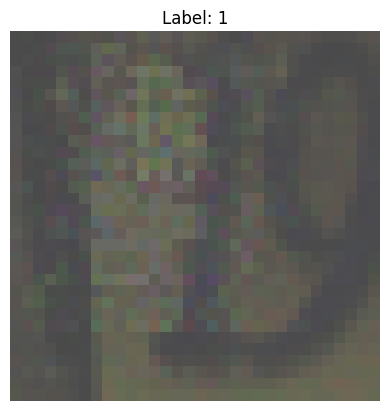

In [17]:

if 'cw' in flags:
    print(cw_mnist_accuracy)
    print(len(cw_mnist_examples))
    print(len(cw_mnist_examples[0]))
    print(cw_mnist_examples[0][2].shape)

    curator.store_data('augmented_data/cw_mnist_augmented_data.csv', cw_mnist_examples)

    print(cw_cifar10_accuracy)
    print(len(cw_cifar10_examples))
    print(len(cw_cifar10_examples[0]))
    print(cw_cifar10_examples[0][2].shape)

    curator.store_data('augmented_data/cw_cifar10_augmented_data.csv', cw_cifar10_examples, color = True)

    print(cw_svhn_accuracy)
    print(len(cw_svhn_examples))
    print(len(cw_svhn_examples[0]))
    print(cw_svhn_examples[0][2].shape)

    curator.store_data('augmented_data/cw_svhn_augmented_data.csv', cw_svhn_examples, color = True)

if 'images' in flags:
    # Load the images from the csv, convert them to h5, and then use the h5 file. 
    if 'cw' in flags:
        images = pd.read_csv("augmented_data/cw_mnist_augmented_data.csv")
        images.to_hdf("augmented_data/cw_mnist_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/cw_mnist_augmented_data.h5')
    print(images.head)
    print(images.shape)
    labels = images.iloc[:, 0]  
    images = images.iloc[:, 1:]  

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image1 = reshape_image(first_image)

    if 'cw' in flags:
        images = pd.read_csv("augmented_data/cw_cifar10_augmented_data.csv")
        images.to_hdf("augmented_data/cw_cifar10_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/cw_cifar10_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image2 = reshape_image(np.array(first_image), color = True)
    print(reshaped_image2.shape)



    if 'cw' in flags:
        images = pd.read_csv("augmented_data/cw_svhn_augmented_data.csv")
        images.to_hdf("augmented_data/cw_svhn_augmented_data.h5", key='data', mode='w')
    images = pd.read_hdf('augmented_data/cw_svhn_augmented_data.h5')
    print(images.shape)
    labels = images.iloc[:, 0] 
    images = images.iloc[:, 1:]

    # Selecting the first image and its label
    first_image = images.iloc[0]
    first_label = int(labels.iloc[0])

    # Reshape the image
    reshaped_image3= reshape_image(np.array(first_image), color = True)
    print(reshaped_image3.shape)
    # Display the image with its label
    plt.imshow(reshaped_image3)
    plt.title(f"Label: {first_label}")
    plt.axis('off')
    plt.show()